In [129]:
from qiskit import QuantumCircuit, assemble
from qiskit_aer import Aer
from qiskit.quantum_info import Operator
import numpy as np
from qiskit.circuit.library.standard_gates.x import XGate, MCXGate
from qiskit.visualization import plot_histogram

In [130]:
oracle_matrix = np.identity(2**4)
oracle_matrix[12, 12] = -1

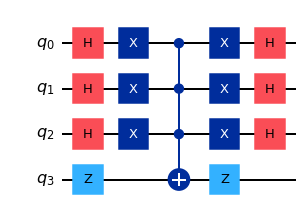

In [131]:
globaldiffuser = QuantumCircuit(4)
globaldiffuser.h(range(3))
globaldiffuser.x(range(3))  
globaldiffuser.z(3)
control1 =  XGate().control(3, None, '111')
globaldiffuser.append(control1, [0, 1, 2, 3])
globaldiffuser.z(3)
globaldiffuser.x(range(3))
globaldiffuser.h(range(3))
globaldiffuser.draw('mpl')

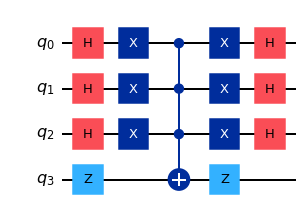

In [132]:
# global diffuser
globaldiffuser1 = QuantumCircuit(4)
globaldiffuser1.h(range(3))
globaldiffuser1.x(range(3))  
globaldiffuser1.z(3)
control2 =  XGate().control(3, None, '111')
globaldiffuser1.append(control2, [0, 1, 2, 3])
globaldiffuser1.z(3)
globaldiffuser1.x(range(3))
globaldiffuser1.h(range(3))
globaldiffuser1.draw('mpl')

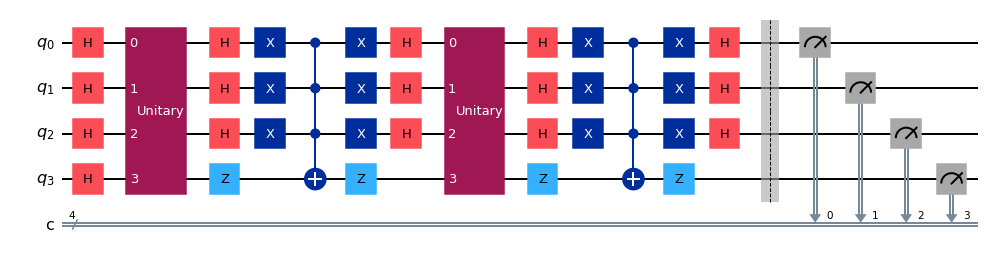

In [133]:
qc = QuantumCircuit(4,4)
qc.h(range(4))
qc.unitary(Operator(oracle_matrix), range(4))
qc = qc.compose(globaldiffuser)
qc.unitary(Operator(oracle_matrix), range(4))
qc = qc.compose(globaldiffuser1)
qc.barrier()      
qc.measure(range(4),range(4))      
qc.draw('mpl')

/var/folders/wg/y3_4dfgd0pn8gbhx7rpxvt2w0000gn/T/ipykernel_2167/2314434741.py:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = svsim.run(qobj).result()


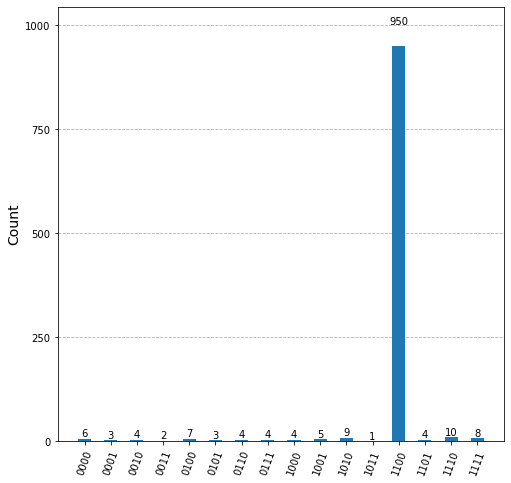

In [134]:
svsim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = svsim.run(qobj).result()
plot_histogram(result.get_counts(),(8,8))